# Возможности увеличения выручки

In [1]:
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib as mpl
import matplotlib.pyplot as plt 
import os
import datetime as dt
import scipy.stats as stats

In [2]:
pd.options.display.max_colwidth = 150

In [3]:
pthl1 = '/datasets/hypothesis.csv'
pthl2 = '/datasets/orders.csv'
pthl3 = '/datasets/visitors.csv'

pthw1 = 'datasets\hypothesis.csv'
pthw2 = 'datasets\orders.csv'
pthw3 = 'datasets\visitors.csv'

In [4]:
alpha = 0.05  # критический уровень статистической значимости

In [5]:
if os.path.exists(pthl1):
    hypothesis = pd.read_csv(pthl1)
elif os.path.exists(pthw1):
    hypothesis = pd.read_csv(pthw1)
else:
    print('Something is wrong')

In [6]:
if os.path.exists(pthl2):
    orders = pd.read_csv(pthl2, parse_dates=['date'])
elif os.path.exists(pthw2):
    orders = pd.read_csv(pthw2, parse_dates=['date'])
else:
    print('Something is wrong')

In [7]:
if os.path.exists(pthl3):
    visitors = pd.read_csv(pthl3, parse_dates=['date'])
elif os.path.exists(pthw3):
    visitors = pd.read_csv(pthw3, parse_dates=['date'])
else:
    print('Something is wrong')

In [8]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [9]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [10]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


Проверяем на явные дубликаты

In [11]:
orders.duplicated().sum()

0

In [12]:
visitors.duplicated().sum()

0

Смотрим кол-во пропусков по столбцам

In [13]:
resume = 'Пропусков не обнаружено'
for i in orders:
    if len(orders[orders[i].isna()]) != 0:
        resume = 'Пропуски обнаружены'
        print(i, '-', len(orders[orders[i].isna()])) # выводим только пропуски
print(resume)

Пропусков не обнаружено


In [14]:
resume = 'Пропусков не обнаружено'
for i in visitors:
    if len(visitors[visitors[i].isna()]) != 0:
        resume = 'Пропуски обнаружены'
        print(i, '-', len(visitors[visitors[i].isna()])) # выводим только пропуски
print(resume)

Пропусков не обнаружено


## Приоритизация гипотез

In [15]:
display(hypothesis)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [16]:
hypothesis.columns = hypothesis.columns.str.lower()

In [17]:
hypothesis['ICE'] = round(hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts'], 2)
display(hypothesis[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False))

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


In [18]:
hypothesis['RICE'] = hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']
display(hypothesis[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False))

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


С добавлением охвата меняется приоретизация гипотез. При малом охвате, влияние не такое уж и серьёзное будет.

С применением фреймворка ICE лидерами стали гипотезы 8, 0 и 7. <br>
Фреймворк RICE выводит в безоговорочные лидеры гипотезу 7. <br>
Видимо, с неё стоит начать.

## Анализ A/B-теста

In [19]:
display(orders.head())

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [20]:
orders.columns = ['transaction_id', 'visitor_id', 'date', 'revenue', 'group']

In [21]:
display(visitors)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


In [22]:
print(visitors['group'].unique())

['A' 'B']


Есть всего 2 группы, тест парный.

In [23]:
visitors_per_date_a = visitors.loc[visitors['group'] == 'A']
visitors_per_date_b = visitors.loc[visitors['group'] == 'B']

In [24]:
print('Начало теста группы А:', visitors_per_date_a['date'].min(), ', Окончание:', visitors_per_date_a['date'].max())
print('Начало теста группы А:', visitors_per_date_b['date'].min(), ', Окончание:', visitors_per_date_a['date'].max())

Начало теста группы А: 2019-08-01 00:00:00 , Окончание: 2019-08-31 00:00:00
Начало теста группы А: 2019-08-01 00:00:00 , Окончание: 2019-08-31 00:00:00


Тест по обеим группам начат и закончен одновременно

Создадим переменные по группам "А" и "В" с id посетителей, которые заказывали хотя бы 1 раз, и количеством заказов.

In [25]:
orders_by_users_a = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
orders_by_users_a.columns = ['visitor_id', 'orders']

orders_by_users_b = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
orders_by_users_b.columns = ['visitor_id', 'orders']

Сравним кол-во посетителей в группах

In [26]:
nunique_users_a = orders_by_users_a['visitor_id'].nunique()
nunique_users_b = orders_by_users_b['visitor_id'].nunique()
print(nunique_users_a)
print(nunique_users_b)

503
586


In [27]:
nunique_users_b/nunique_users_a-1

0.16500994035785288

Разница в количестве пользователей 16%. Что-то многовато.

Проверим перекрёстную уникальность пользователей

In [28]:
orders_by_users_unique_a = orders_by_users_a['visitor_id'].unique()
orders_by_users_unique_b = orders_by_users_b['visitor_id'].unique()

In [29]:
orders_not_unique = np.intersect1d(orders_by_users_unique_a, orders_by_users_unique_b)
len(orders_not_unique)

58

In [30]:
print(round(len(orders_not_unique)/len(orders_by_users_unique_a), 5), '- доля дублей в группе А')
print(round(len(orders_not_unique)/len(orders_by_users_unique_b), 5), '- доля дублей в группе В')
print(round((len(orders_by_users_unique_b)-len(orders_not_unique))/len(orders_by_users_unique_a)-1, 5), '- разница в объёме групп при удалении дублей из группы В')
print(round((len(orders_by_users_unique_b)-len(orders_not_unique))/(len(orders_by_users_unique_a)-len(orders_not_unique))-1, 5), '- разница в объёме групп при удалении дублей из обеих групп')
print(round(len(orders_by_users_unique_b)/len(orders_by_users_unique_a)-1, 5), '- разница в исходном объёме групп')

0.11531 - доля дублей в группе А
0.09898 - доля дублей в группе В
0.0497 - разница в объёме групп при удалении дублей из группы В
0.18652 - разница в объёме групп при удалении дублей из обеих групп
0.16501 - разница в исходном объёме групп


### Кумулятивная выручка

In [31]:
# создаем массив уникальных пар значений дат и групп теста
dates_groups = orders[['date','group']].drop_duplicates() 

In [32]:
# получим агрегированные кумулятивные по дням данные о заказах 
orders_aggregated = dates_groups.apply(lambda x: orders[np.logical_and(orders['date'] <= 
                    x['date'], orders['group'] == x['group'])].agg(
                    {'date' : 'max', 'group' : 'max', 'transaction_id' : 'nunique', 
                     'visitor_id' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [33]:
# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitors_aggregated = dates_groups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= 
                      x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 
                      'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [34]:
# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulative_data = orders_aggregated.merge(visitors_aggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulative_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

In [35]:
display(cumulative_data.head(5)) 

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


In [36]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulative_revenue_a = cumulative_data[cumulative_data['group']=='A'][['date','revenue', 'orders']]

In [37]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulative_revenue_b = cumulative_data[cumulative_data['group']=='B'][['date','revenue', 'orders']]

Построим графики кумулятивной выручки по дням и группам A/B-тестирования.

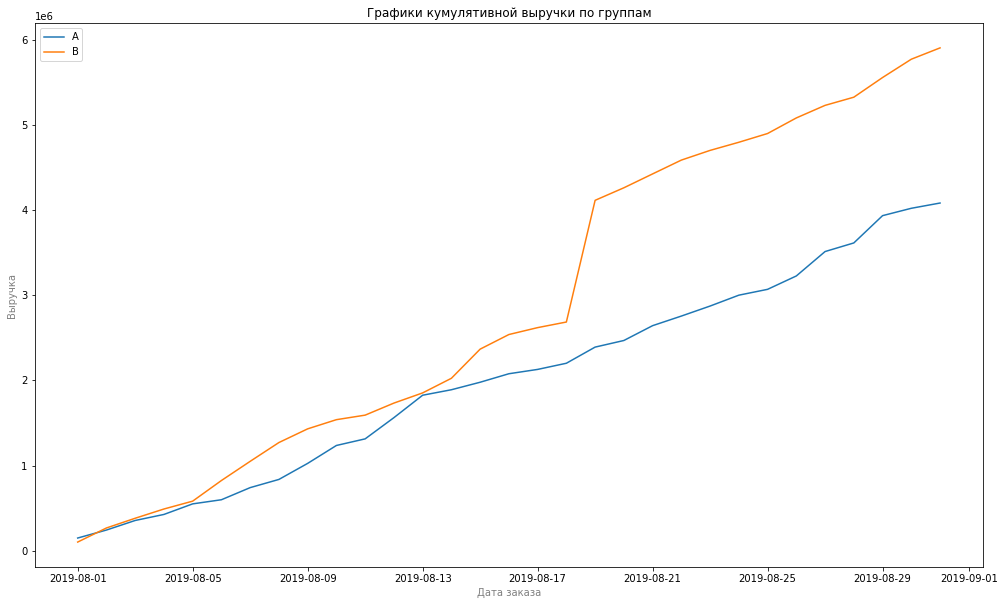

In [38]:
plt.figure(figsize=(17,10))
plt.grid=True
plt.title('Графики кумулятивной выручки по группам')
plt.xlabel('Дата заказа', color='gray')
plt.ylabel('Выручка',color='gray')

# Строим график выручки группы А
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue'], label='B')

plt.legend();

Выручка почти равномерно увеличивается в течение всего теста.
Однако, график выручки группы "В" резко вырос однажды, затем продолжил плавный рост. Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке.

### Средний чек

Построим графики среднего чека по группам, разделив кумулятивную выручку на кумулятивное число заказов.

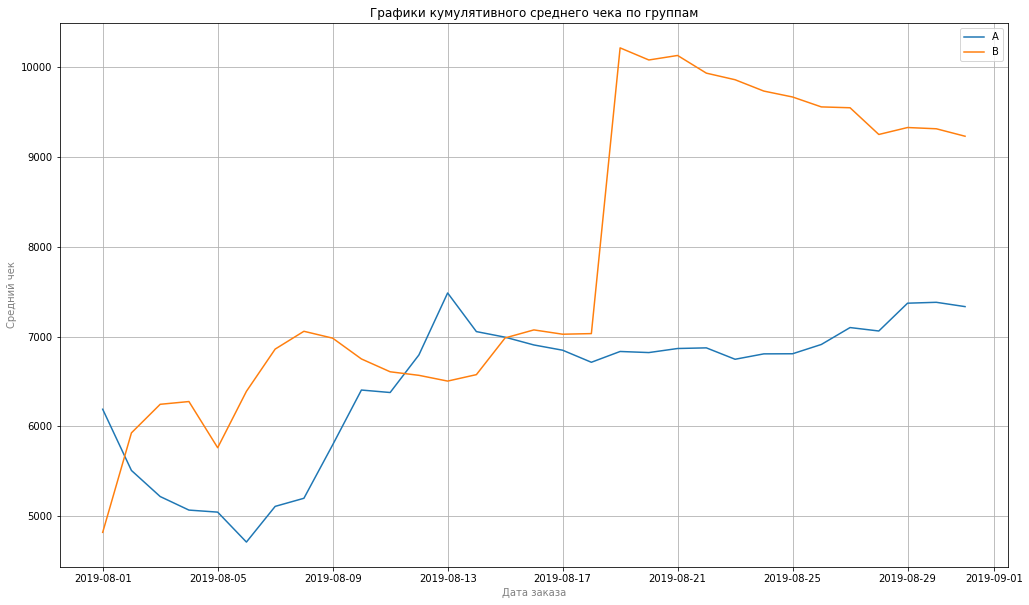

In [39]:
fig, ax = plt.subplots(figsize=(17,10))
ax.grid(True)
plt.title('Графики кумулятивного среднего чека по группам')
plt.xlabel('Дата заказа', color='gray')
plt.ylabel('Средний чек',color='gray')
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue']/cumulative_revenue_a['orders'], label='A')
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue']/cumulative_revenue_b['orders'], label='B')
plt.legend();

Средний чек по группе "А" становится равномерным ближе к концу теста. По группе "В" происходят резкие всплески, затем, падения. То же видно и на графике кумулятивной выручки. Возможно, в группу "B" попали крупные заказы (резкий всплеск на графике за один день).

### Изменение среднего чека

Построим график относительного различия для среднего чека.

In [40]:
# собираем данные в одном датафрейме
merged_cumulative_revenue = cumulative_revenue_a.merge(cumulative_revenue_b, 
                            left_on='date', right_on='date', how='left', suffixes=['_a', '_b'])

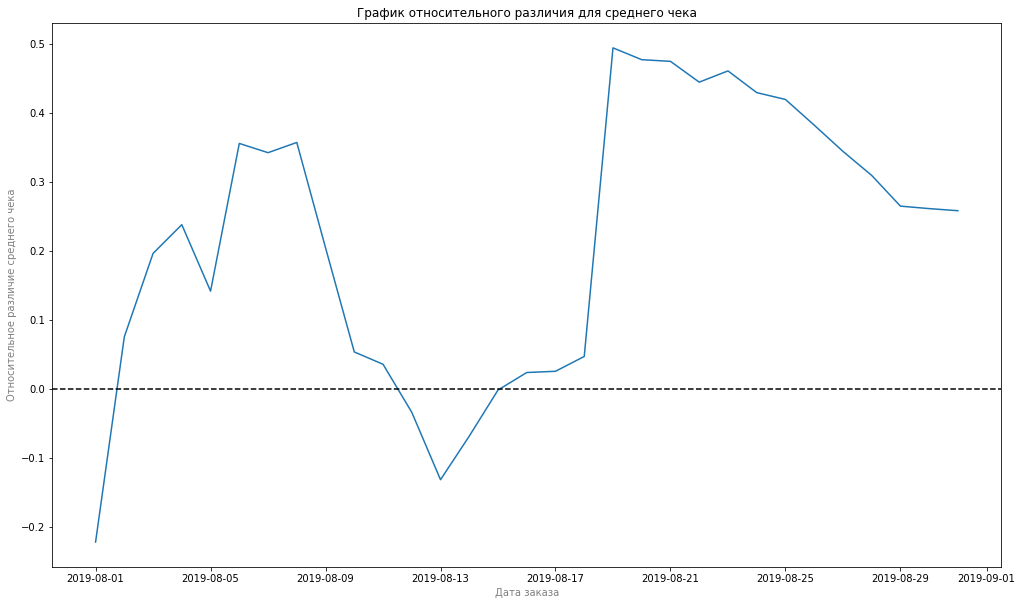

In [41]:
plt.figure(figsize=(17,10))
plt.grid=True
plt.title('График относительного различия для среднего чека')
plt.xlabel('Дата заказа', color='gray')
plt.ylabel('Относительное различие среднего чека',color='gray')

# cтроим отношение средних чеков
plt.plot(merged_cumulative_revenue['date'], 
         (merged_cumulative_revenue['revenue_b']/merged_cumulative_revenue['orders_b'])/
         (merged_cumulative_revenue['revenue_a']/merged_cumulative_revenue['orders_a'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--');

В нескольких точках график различия между сегментами резко «скачет». Где-то точно есть крупные заказы и выбросы!

### Среднее количество заказов

Построим графики кумулятивного среднего количества заказов на посетителя по группам.

In [42]:
# датафрейм с кумулятивным количеством заказов и кумулятивными посетителями по дням в группе А
cumulative_orders_a = cumulative_data[cumulative_data['group']=='A'][['date','visitors', 'orders']]

In [43]:
# датафрейм с кумулятивным количеством заказов и кумулятивными посетителями по дням в группе В
cumulative_orders_b = cumulative_data[cumulative_data['group']=='B'][['date','visitors', 'orders']]

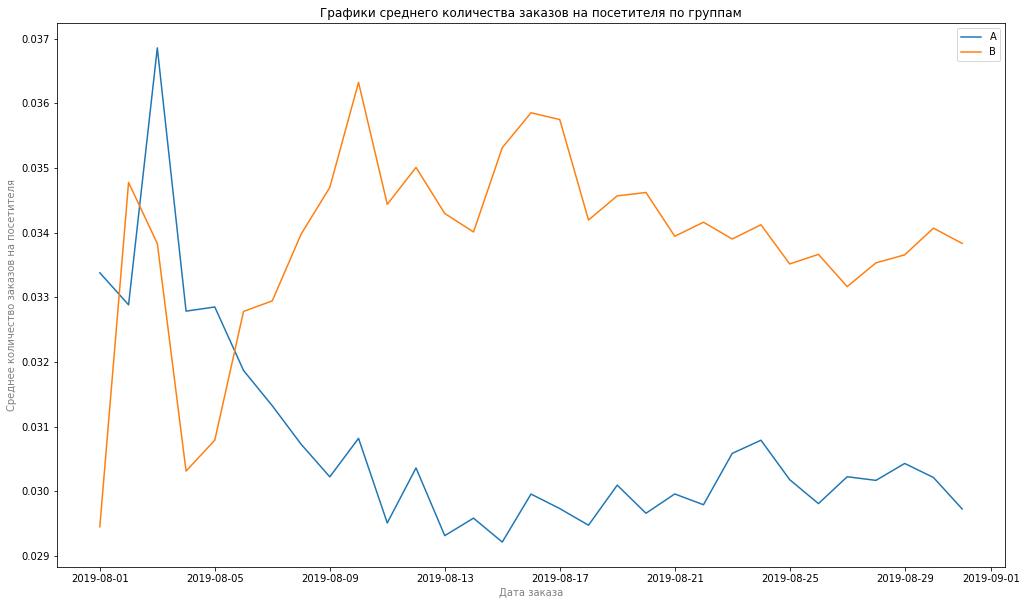

In [44]:
plt.figure(figsize=(17,10))
plt.grid=True
plt.title('Графики среднего количества заказов на посетителя по группам')
plt.xlabel('Дата заказа', color='gray')
plt.ylabel('Среднее количество заказов на посетителя',color='gray')
plt.plot(cumulative_orders_a['date'], cumulative_orders_a['orders']/cumulative_orders_a['visitors'], label='A')
plt.plot(cumulative_orders_b['date'], cumulative_orders_b['orders']/cumulative_orders_b['visitors'], label='B')
plt.legend();

В начале резкие скачки, затем приближается к стабилизации.

### Изменение среднего количества заказов.

Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A.

In [45]:
# собираем данные в одном датафрейме
merged_сumulative_orders = cumulative_orders_a.merge(cumulative_orders_b, 
                        left_on='date', right_on='date', how='left', suffixes=['_a', '_b'])

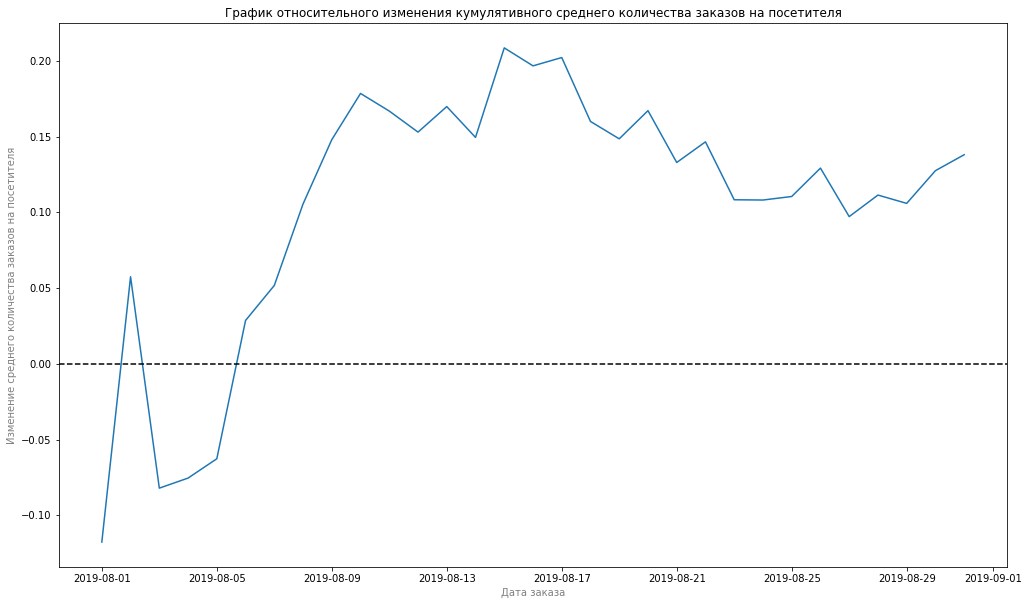

In [46]:
plt.figure(figsize=(17,10))
plt.grid=True
plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя')
plt.xlabel('Дата заказа', color='gray')
plt.ylabel('Изменение среднего количества заказов на посетителя',color='gray')

# cтроим отношение средних чеков
plt.plot(merged_сumulative_orders['date'], 
         (merged_сumulative_orders['orders_b']/merged_сumulative_orders['visitors_b'])/
         (merged_сumulative_orders['orders_a']/merged_сumulative_orders['visitors_a'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--');

Среднее количество заказов значительно больше в группе "В".

### Количество заказов

Построим график количества заказов по пользователям

In [47]:
orders_by_users = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'}))

orders_by_users.columns = ['visitor_id', 'orders']

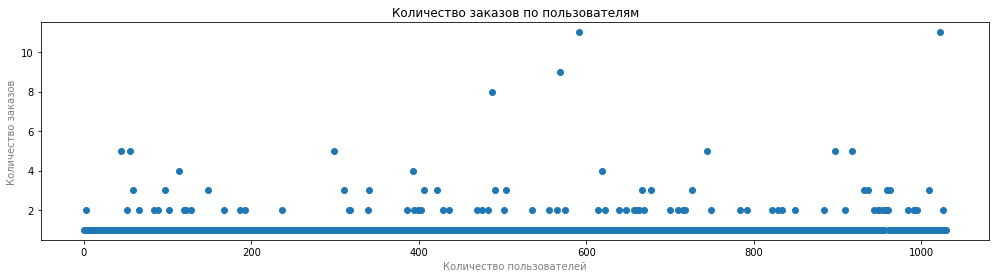

In [48]:
plt.figure(figsize=(17, 4))
plt.grid=True
plt.title('Количество заказов по пользователям')
plt.xlabel('Количество пользователей', color='gray')
plt.ylabel('Количество заказов',color='gray')
x_values = pd.Series(range(0,len(orders_by_users)))

plt.scatter(x_values, orders_by_users['orders']);

Большинство покупателей заказывали только один раз. Однако доля пользователей с 2-3 заказами тоже значительна. 
Их точная доля не ясна — непонятно, считать их аномалиями или нет. 

### Перцентили количества заказов

Посчитаем выборочные перцентили количества заказов на одного пользователя

In [49]:
print(np.percentile(orders_by_users['orders'], [90, 95, 99]))

[1. 2. 4.]


Не более 5% пользователей оформляли больше 2 заказов, 10% пользователей заказывали более одного раза. 
Наверное, стоит выбрать 2 заказа на одного пользователя за верхнюю границу числа заказов, и отсеять аномальных пользователей по ней.

### Cтоимость заказов

Оценим стоимость заказов.

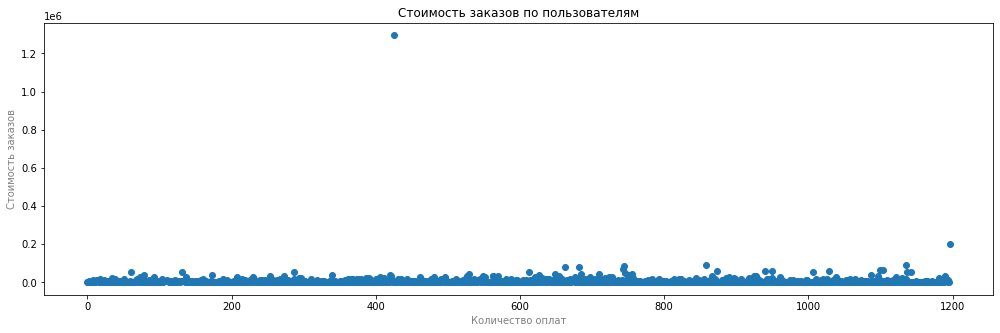

In [50]:
plt.figure(figsize=(17,5))
plt.grid=True
plt.title('Cтоимость заказов по пользователям')
plt.xlabel('Количество оплат', color='gray')
plt.ylabel('Cтоимость заказов',color='gray')
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']);

Есть явные аномалии. Стоит от них избавиться.

In [51]:
orders.sort_values(by='revenue', ascending=False).head()

,transaction_id,visitor_id,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B
1196,3936777065,2108080724,2019-08-15,202740,B
858,192721366,1316129916,2019-08-27,93940,A
1136,666610489,1307669133,2019-08-13,92550,A
744,3668308183,888512513,2019-08-27,86620,B


Уберём аномальные оплаты и снова посмотрим график

In [52]:
orders_w_o_max = orders.loc[(orders['revenue'] != orders['revenue'].max())]
orders_w_o_max = orders_w_o_max.loc[(orders_w_o_max['revenue'] != orders_w_o_max['revenue'].max())]

In [53]:
orders_w_o_max.sort_values(by='revenue', ascending=False).head()

,transaction_id,visitor_id,date,revenue,group
858,192721366,1316129916,2019-08-27,93940,A
1136,666610489,1307669133,2019-08-13,92550,A
744,3668308183,888512513,2019-08-27,86620,B
682,1216533772,4266935830,2019-08-29,78990,B
662,1811671147,4266935830,2019-08-29,78990,A


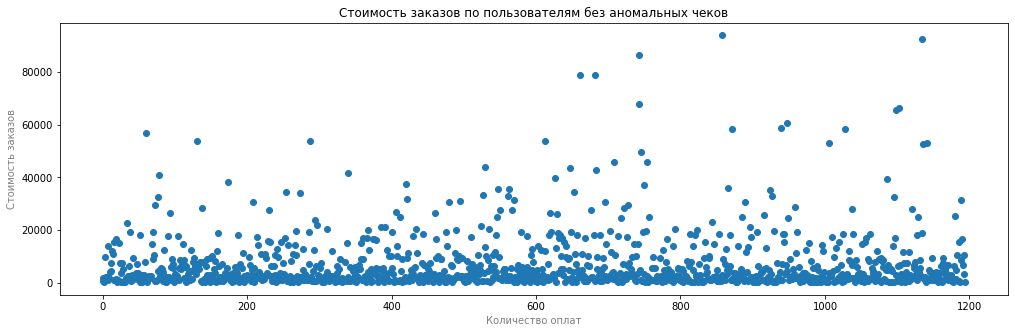

In [54]:
plt.figure(figsize=(17,5))
plt.grid=True
plt.title('Cтоимость заказов по пользователям без аномальных чеков')
plt.xlabel('Количество оплат', color='gray')
plt.ylabel('Cтоимость заказов',color='gray')
x_values = pd.Series(range(0,len(orders_w_o_max['revenue'])))
plt.scatter(x_values, orders_w_o_max['revenue']);

### Перцентили стоимости заказов

Перцентили стоимости заказов по "сырым" данным

In [55]:
print(np.percentile(orders['revenue'], [90, 95, 99]))

[18168.  28000.  58233.2]


Перцентили стоимости заказов без аномальных чеков

In [56]:
print(np.percentile(orders_w_o_max['revenue'], [90, 95, 99]))

[18002.  27565.  56744.2]


Не более 5% заказов дороже 28 000 рублей и не более 1% дороже 58 233 рублей. <br>
Принимаем за верхнюю границу 28 000 рублей.

### Cтатистическая значимость различия в среднем количестве заказов на посетителя

Посчитаем статистическую значимость различия в среднем количестве заказов на посетителя между группами по «сырым» данным.

Сформулируем гипотезы.
* Нулевая: различий в среднем количестве заказов на посетителя между группами нет. 
* Альтернативная: различия в среднем количестве заказов на посетителя между группами есть.

Применим критерий Манна-Уитни, т.к. в данных естть выбросы.

Объявим переменные orders_a и orders_b, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули. 

In [57]:
orders_a = pd.concat(
    [
        orders_by_users_a['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors_per_date_a['visitors'].sum() - len(orders_by_users_a['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

orders_b = pd.concat(
    [
        orders_by_users_b['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors_per_date_b['visitors'].sum() - len(orders_by_users_b['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

avg_per_user_stat_pvalue_value_raw = round(stats.mannwhitneyu(orders_a, orders_b)[1], 5)
avg_per_user_stat_pvalue_raw = 'p-value - ' + "{0:.5f}".format(avg_per_user_stat_pvalue_value_raw)
reg_per_user_differencee_value_raw = round(orders_b.mean() / orders_a.mean() - 1, 3)
reg_per_user_differencee_raw = 'Oтносительная разница - ' + "{0:.3f}".format(reg_per_user_differencee_value_raw)
reg_per_user_differencee_raw_percent = round(reg_per_user_differencee_value_raw*100, 2).astype('str')

if avg_per_user_stat_pvalue_value_raw < alpha:
    avg_per_user_stat_pvalue_raw_result = 'Есть статистически значимое различие в среднем количестве заказов на посетителя между группами.'
else:
    avg_per_user_stat_pvalue_raw_result = 'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'

if reg_per_user_differencee_value_raw > 0:
    reg_per_user_differencee_raw_result = 'Относительный выигрыш группы "B" равен ' + reg_per_user_differencee_raw_percent + '%.'
else:
    reg_per_user_differencee_raw_result = 'Относительный проигрыш группы "B" равен ' + reg_per_user_differencee_raw_percent + '%.'

per_user_stat_raw_label = 'Cтатистическая значимость различия в среднем количестве заказов на посетителя по «сырым» данным.'

print(per_user_stat_raw_label)
print(avg_per_user_stat_pvalue_raw)
print(reg_per_user_differencee_raw)
print(avg_per_user_stat_pvalue_raw_result)
print(reg_per_user_differencee_raw_result)

Cтатистическая значимость различия в среднем количестве заказов на посетителя по «сырым» данным.
p-value - 0.01679
Oтносительная разница - 0.138
Есть статистически значимое различие в среднем количестве заказов на посетителя между группами.
Относительный выигрыш группы "B" равен 13.8%.


Есть статистически значимое различие в среднем количестве заказов на посетителя между группами. При этом, относительный выигрыш группы "B" равен 13,8%

### Cтатистическая значимость различий в среднем чеке

Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.

Нулевая гипотеза: различий в среднем чеке между группами нет. Альтернативная гипотеза: различия в среднем чеке между группами есть. 

In [58]:
avg_receipt_stat_pvalue_value_raw = round(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], 
                                          orders[orders['group']=='B']['revenue'])[1], 5)
avg_receipt_stat_pvalue_raw = 'p-value - ' + "{0:.5f}".format(avg_receipt_stat_pvalue_value_raw)
reg_receipt_differencee_value_raw = orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean() - 1
reg_receipt_differencee_raw = 'Oтносительная разница - ' + "{0:.3f}".format(reg_receipt_differencee_value_raw)
reg_receipt_differencee_value_raw_persent = round(reg_receipt_differencee_value_raw * 100, 2).astype('str')

if avg_receipt_stat_pvalue_value_raw < alpha:
    avg_receipt_stat_pvalue_raw_result = 'Есть статистически значимое различие в среднем чеке.'
else:
    avg_receipt_stat_pvalue_raw_result = 'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'

if reg_receipt_differencee_value_raw > 0:
    reg_receipt_differencee_raw_result = 'Относительный выигрыш группы "B" равен ' + reg_receipt_differencee_value_raw_persent + '%.'
else:
    reg_receipt_differencee_raw_result = 'Относительный проигрыш группы "B" равен ' + reg_receipt_differencee_value_raw_persent + '%.'

avg_receipt_stat_raw_label = 'Cтатистическая значимость различий в среднем чеке заказа между группами по «сырым» данным.'

print(avg_receipt_stat_raw_label)
print(avg_receipt_stat_pvalue_raw)
print(reg_receipt_differencee_raw)
print(avg_receipt_stat_pvalue_raw_result)
print(reg_receipt_differencee_raw_result)

Cтатистическая значимость различий в среднем чеке заказа между группами по «сырым» данным.
p-value - 0.72929
Oтносительная разница - 0.259
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя
Относительный выигрыш группы "B" равен 25.87%.


P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Впрочем, средний чек группы B значительно больше среднего чека группы A.

### Cтатистическая значимость различий в среднем количестве заказов на посетителя

Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.

Примем за аномальных пользователей тех, кто совершил от 2 заказов или совершил заказ дороже 28 000 рублей. Так мы уберём 5% пользователей с наибольшим числом заказов и от 1% до 5% пользователей с дорогими заказами. Сделаем срезы пользователей с числом заказов больше 2 — users_with_many_orders и пользователей, совершивших заказы дороже 28 000 — users_with_expensive_orders. Объединим их в таблице abnormal_users. 

In [59]:
users_with_many_orders = pd.concat(
    [
        orders_by_users_a[orders_by_users_a['orders'] > np.percentile(orders_by_users['orders'], 95)]['visitor_id'],
        orders_by_users_b[orders_by_users_b['orders'] > np.percentile(orders_by_users['orders'], 95)]['visitor_id'],
    ],
    axis=0,
)
users_with_expensive_orders = orders[orders['revenue'] > np.percentile(orders['revenue'], 95)]['visitor_id']
abnormal_users = (
    pd.concat([users_with_many_orders, users_with_expensive_orders], axis=0)
    .drop_duplicates()
    .sort_values()
)

Узнаем, сколько всего аномальных пользователей атрибутом shape.

In [60]:
print(abnormal_users.shape[0])

74


Узнаем относительные потери после очистки данных от аномалий

In [61]:
abnormal_users.nunique()/orders['visitor_id'].nunique()

0.07177497575169738

7% - это много или мало? Точно больше критичных 5%.

Сформулируем гипотезы. Нулевая: различий в среднем количестве заказов на посетителя между группами нет. Альтернативная: различия в среднем между группами есть.

Узнаем, как их действия повлияли на результаты теста. Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами теста по очищенным данным. Сначала подготовим выборки количества заказов по пользователям по группам теста:

In [62]:
orders_a_filtered = pd.concat(
    [
        orders_by_users_a[
            np.logical_not(orders_by_users_a['visitor_id'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors_per_date_a['visitors'].sum() - len(orders_by_users_a['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

orders_b_filtered = pd.concat(
    [
        orders_by_users_b[
            np.logical_not(orders_by_users_b['visitor_id'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors_per_date_b['visitors'].sum() - len(orders_by_users_b['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

Применим статистический критерий Манна-Уитни к полученным выборкам:

In [63]:
avg_per_user_stat_pvalue_value_clear = round(stats.mannwhitneyu(orders_a_filtered, orders_b_filtered)[1], 5)
avg_per_user_stat_pvalue_clear = 'p-value - ' + "{0:.5f}".format(avg_per_user_stat_pvalue_value_clear)
reg_per_user_differencee_value_clear = orders_b_filtered.mean() / orders_a_filtered.mean() - 1
reg_per_user_differencee_clear = 'Oтносительная разница - ' + "{0:.3f}".format(reg_per_user_differencee_value_clear)
reg_per_user_differencee_value_clear_persent = round(reg_per_user_differencee_value_clear * 100, 2).astype('str')

if avg_per_user_stat_pvalue_value_clear < alpha:
    avg_per_user_stat_clear_result = 'Есть статистически значимое различие в среднем количестве заказов на посетителя между группами.'
else:
    avg_per_user_stat_clear_result = 'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'

if reg_per_user_differencee_value_clear > 0:
    reg_per_user_differencee_clear_result = 'Относительный выигрыш группы "B" равен ' + reg_per_user_differencee_value_clear_persent + '%.'
else:
    reg_per_user_differencee_clear_result = 'Относительный проигрыш группы "B" равен ' + reg_per_user_differencee_value_clear_persent + '%.'

per_user_stat_clear_label = 'Cтатистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.'
    
print(per_user_stat_clear_label)
print(avg_per_user_stat_pvalue_clear)
print(reg_per_user_differencee_clear)
print(avg_per_user_stat_clear_result)
print(reg_per_user_differencee_clear_result)

Cтатистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.
p-value - 0.01304
Oтносительная разница - 0.173
Есть статистически значимое различие в среднем количестве заказов на посетителя между группами.
Относительный выигрыш группы "B" равен 17.27%.


Результаты по среднему количеству заказов изменились не в лучшую сторону. 

Статистически значимое различие в среднем количестве заказов на посетителя между группами увеличилось. При этом, относительный выигрыш группы "B" равен 17,3%. Она стала ещё больше лидировать.

### Cтатистическая значимость различий в среднем чеке заказа

Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.

Нулевая гипотеза: различий в среднем чеке между группами нет. Альтернативная гипотеза: различия в среднем чеке между группами есть.

In [64]:
avg_receipt_stat_pvalue_value_clear = round(
            stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormal_users)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormal_users)),
                )
            ]['revenue'],
        )[1]
, 5)

In [65]:
reg_receipt_differencee_value_clear = (
         orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormal_users)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormal_users)),
            )
        ]['revenue'].mean()
        - 1
)

In [66]:
avg_receipt_stat_pvalue_clear = 'p-value - ' + "{0:.5f}".format(avg_receipt_stat_pvalue_value_clear)
reg_receipt_differencee_clear = 'Oтносительная разница - ' + "{0:.3f}".format(reg_receipt_differencee_value_clear)
reg_receipt_differencee_value_clear_persent = round(reg_receipt_differencee_value_clear * 100, 2).astype('str')

if avg_receipt_stat_pvalue_value_clear < alpha:
    avg_receipt_stat_pvalue_clear_result = 'Есть статистически значимое различие в среднем чеке.'
else:
    avg_receipt_stat_pvalue_clear_result = 'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'

if reg_receipt_differencee_value_clear > 0:
    reg_receipt_differencee_clear_result = 'Относительный выигрыш группы "B" равен ' + reg_receipt_differencee_value_clear_persent + '%.'
else:
    reg_receipt_differencee_clear_result = 'Относительный проигрыш группы "B" равен ' + reg_receipt_differencee_value_clear_persent + '%.'
    
avg_receipt_stat_clear_label = 'Cтатистическая значимость различий в среднем чеке заказа по «очищенным» данным.'
    
print(avg_receipt_stat_clear_label)
print(avg_receipt_stat_pvalue_clear)
print(reg_receipt_differencee_clear)
print(avg_receipt_stat_pvalue_clear_result)
print(reg_receipt_differencee_clear_result)

Cтатистическая значимость различий в среднем чеке заказа по «очищенным» данным.
p-value - 0.73848
Oтносительная разница - -0.020
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя
Относительный проигрыш группы "B" равен -1.96%.


P-value увеличился, но и разница между сегментами изменилась с +26% до -2%. Т.е., средний чек группы "В" меньше без аномальных значений.

In [67]:
print(per_user_stat_raw_label)
print(avg_per_user_stat_pvalue_raw)
print(reg_per_user_differencee_raw)
print(avg_per_user_stat_pvalue_raw_result)
print(reg_per_user_differencee_raw_result)
print('')
print(per_user_stat_clear_label)
print(avg_per_user_stat_pvalue_clear)
print(reg_per_user_differencee_clear)
print(avg_per_user_stat_clear_result)
print(reg_per_user_differencee_clear_result)
print('')
print(avg_receipt_stat_raw_label)
print(avg_receipt_stat_pvalue_raw)
print(reg_receipt_differencee_raw)
print(avg_receipt_stat_pvalue_raw_result)
print(reg_receipt_differencee_raw_result)
print('')
print(avg_receipt_stat_clear_label)
print(avg_receipt_stat_pvalue_clear)
print(reg_receipt_differencee_clear)
print(avg_receipt_stat_pvalue_clear_result)
print(reg_receipt_differencee_clear_result)

Cтатистическая значимость различия в среднем количестве заказов на посетителя по «сырым» данным.
p-value - 0.01679
Oтносительная разница - 0.138
Есть статистически значимое различие в среднем количестве заказов на посетителя между группами.
Относительный выигрыш группы "B" равен 13.8%.

Cтатистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.
p-value - 0.01304
Oтносительная разница - 0.173
Есть статистически значимое различие в среднем количестве заказов на посетителя между группами.
Относительный выигрыш группы "B" равен 17.27%.

Cтатистическая значимость различий в среднем чеке заказа между группами по «сырым» данным.
p-value - 0.72929
Oтносительная разница - 0.259
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя
Относительный выигрыш группы "B" равен 25.87%.

Cтатистическая значимость различий в среднем чеке заказа по «очищенным» данным.
p-value - 0.73848
Oтносительная разница - -0.020
Не получилось

### Решение по тесту

Имеющиеся факты:<br>
* Есть статистически значимое различие по среднему количеству заказов между группами и по «сырым», и по данным после фильтрации аномалий;
* Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий;
* График различия среднего количества заказов между группами сообщает, что результаты группы B лучше группы A.
* График различия среднего чека говорит о том, что результаты группы B лучше.

Исходя из обнаруженных фактов, тест следует остановить и зафиксировать победу группы "В". Продолжать смысла нет, потому как вероятность, что при имеющихся данных сегмент "B" на самом деле хуже сегмента "A" — практически нулевая.